In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import torch
from torchvision import models, transforms


In [2]:
TRAIN_CSV_PATH = './UTKFace/utkface_train.csv'
TEST_CSV_PATH = './UTKFace/utkface_test.csv'
df=pd.read_csv(TRAIN_CSV_PATH)
df2=pd.read_csv(TEST_CSV_PATH)

In [3]:
print(df.head())

   Unnamed: 0                                   file  age
0           1  36_0_1_20170117163203851.jpg.chip.jpg   15
1           3  26_1_0_20170116171048641.jpg.chip.jpg    5
2           5  52_0_1_20170117161018159.jpg.chip.jpg   31
3           6  25_1_0_20170117134403373.jpg.chip.jpg    4
4           8  27_0_3_20170119210058457.jpg.chip.jpg    6


In [4]:
df['age'] += 20
df2['age'] += 20

In [5]:
df['gender'] = df['file'].str.split('_').str[1]
df['race'] = df['file'].str.split('_').str[2]
df['gender'] = df['gender'].replace({'0': 'male', '1': 'female'})
df['race']=df['race'].replace({'0':'white','1':'black','2':'asian','3':'indian','4':'others'})
print(df.head())

   Unnamed: 0                                   file  age  gender    race
0           1  36_0_1_20170117163203851.jpg.chip.jpg   35    male   black
1           3  26_1_0_20170116171048641.jpg.chip.jpg   25  female   white
2           5  52_0_1_20170117161018159.jpg.chip.jpg   51    male   black
3           6  25_1_0_20170117134403373.jpg.chip.jpg   24  female   white
4           8  27_0_3_20170119210058457.jpg.chip.jpg   26    male  indian


In [6]:
# 假设你的数据框名为df
# 创建一个条件索引
condition = ~df['race'].isin(['others', 'indian', 'asian', 'black', 'white'])

# 使用.loc替换原始数据框中满足条件的行的"race"列值为"black"
df.loc[condition, 'race'] = 'black'


In [7]:
df2['gender'] = df2['file'].str.split('_').str[1]
df2['race'] = df2['file'].str.split('_').str[2]
df2['gender'] = df2['gender'].replace({'0': 'male', '1': 'female'})
df2['race']=df2['race'].replace({'0':'white','1':'black','2':'asian','3':'indian','4':'others'})
print(df2.head())

   Unnamed: 0                                   file  age  gender    race
0       18896  40_1_3_20170119165539693.jpg.chip.jpg   39  female  indian
1       18897  53_1_0_20170109133404907.jpg.chip.jpg   52  female   white
2       18899  53_0_0_20170120223125364.jpg.chip.jpg   52    male   white
3       18900  34_0_0_20170116232429422.jpg.chip.jpg   33    male   white
4       18901  54_0_0_20170117191422211.jpg.chip.jpg   53    male   white


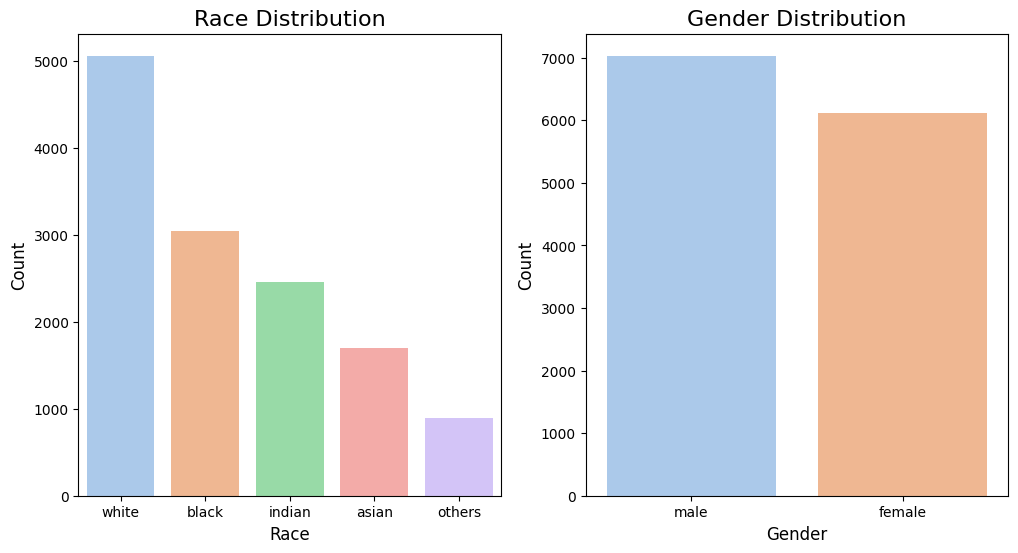

In [9]:

# 假设你的数据框名为df
plt.figure(figsize=(12, 6))

# 绘制种族分布图
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='race', palette='pastel', order=df['race'].value_counts().index)  # 根据计数排序种族
plt.title('Race Distribution', fontsize=16)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)

# 绘制性别分布图
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='gender', palette='pastel')
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)




plt.show()

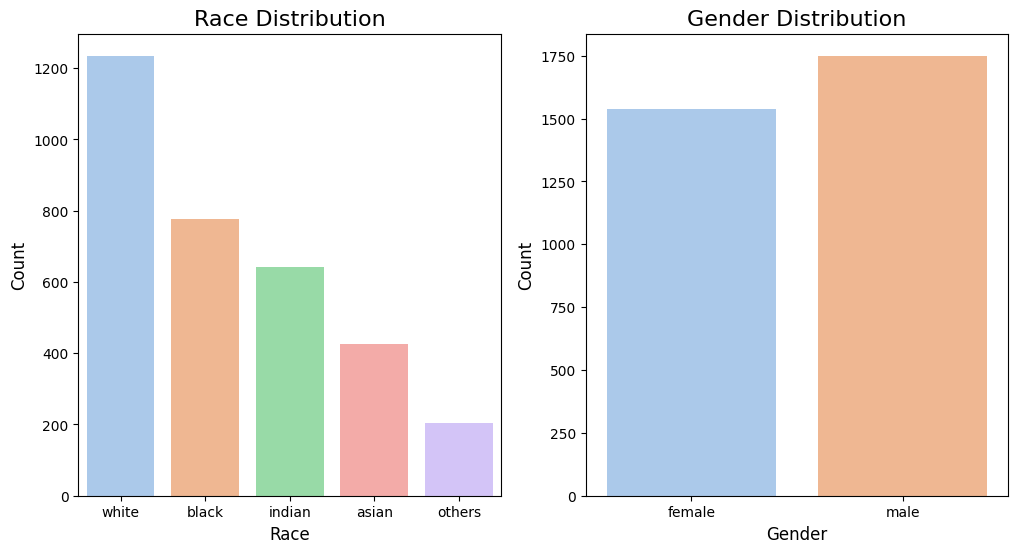

In [10]:

plt.figure(figsize=(12, 6))

# 绘制种族分布图
plt.subplot(1, 2, 1)
sns.countplot(data=df2, x='race', palette='pastel', order=df2['race'].value_counts().index)  # 根据计数排序种族
plt.title('Race Distribution', fontsize=16)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)

# 绘制性别分布图
plt.subplot(1, 2, 2)
sns.countplot(data=df2, x='gender', palette='pastel')
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)




plt.show()


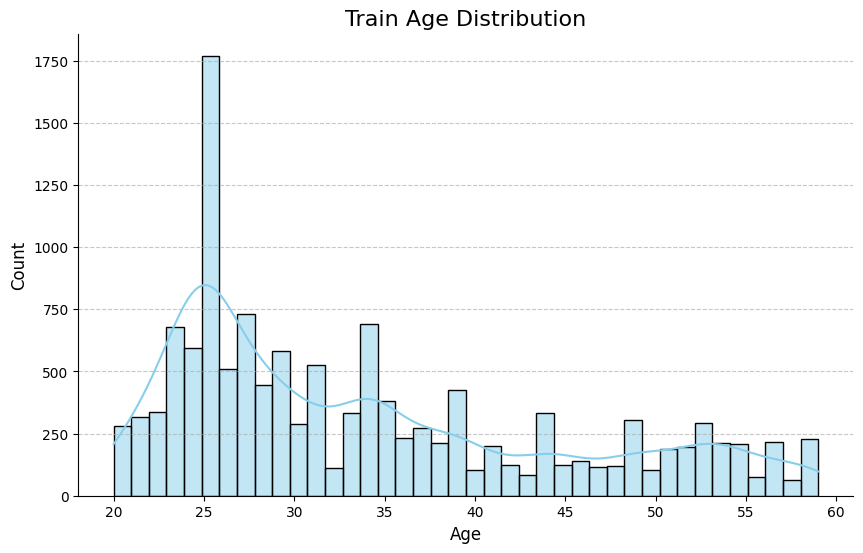

In [55]:
plt.figure(figsize=(10, 6))  # 设置图形大小

# 使用sns.histplot绘制直方图
sns.histplot(data=df, x='age', bins=40, kde=True, color='skyblue', edgecolor='black')  # 自定义颜色和边缘颜色

plt.title('Train Age Distribution', fontsize=16)  # 设置标题和字体大小
plt.xlabel('Age', fontsize=12)  # 设置x轴标签和字体大小
plt.ylabel('Count', fontsize=12)  # 设置y轴标签和字体大小
plt.xticks(fontsize=10)  # 设置x轴刻度字体大小
plt.yticks(fontsize=10)  # 设置y轴刻度字体大小
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 添加水平虚线网格线

sns.despine()  # 移除顶部和右侧的轴线

plt.show()


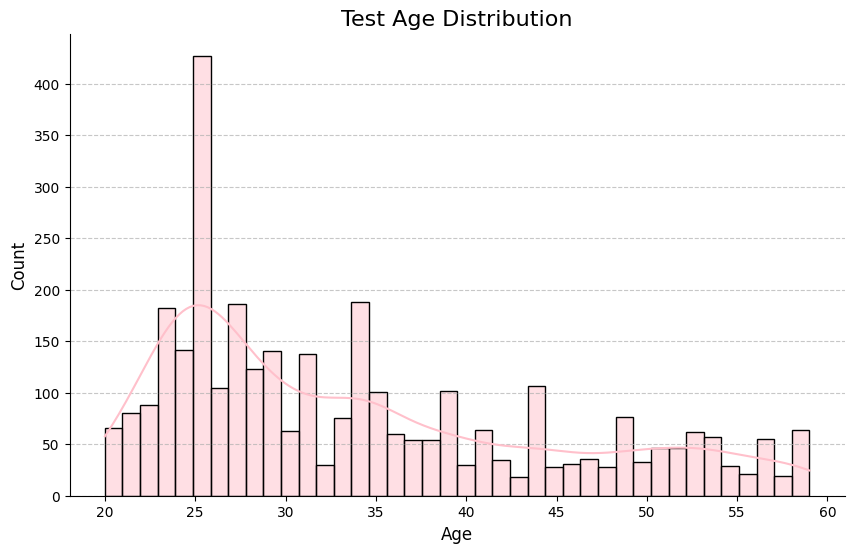

In [56]:
# 假设你的数据框名为df
plt.figure(figsize=(10, 6))  # 设置图形大小

# 使用sns.histplot绘制直方图
sns.histplot(data=df2, x='age', bins=40, kde=True, color='pink', edgecolor='black')  # 自定义颜色和边缘颜色

plt.title('Test Age Distribution', fontsize=16)  # 设置标题和字体大小
plt.xlabel('Age', fontsize=12)  # 设置x轴标签和字体大小
plt.ylabel('Count', fontsize=12)  # 设置y轴标签和字体大小
plt.xticks(fontsize=10)  # 设置x轴刻度字体大小
plt.yticks(fontsize=10)  # 设置y轴刻度字体大小
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 添加水平虚线网格线

sns.despine()  # 移除顶部和右侧的轴线

plt.show()


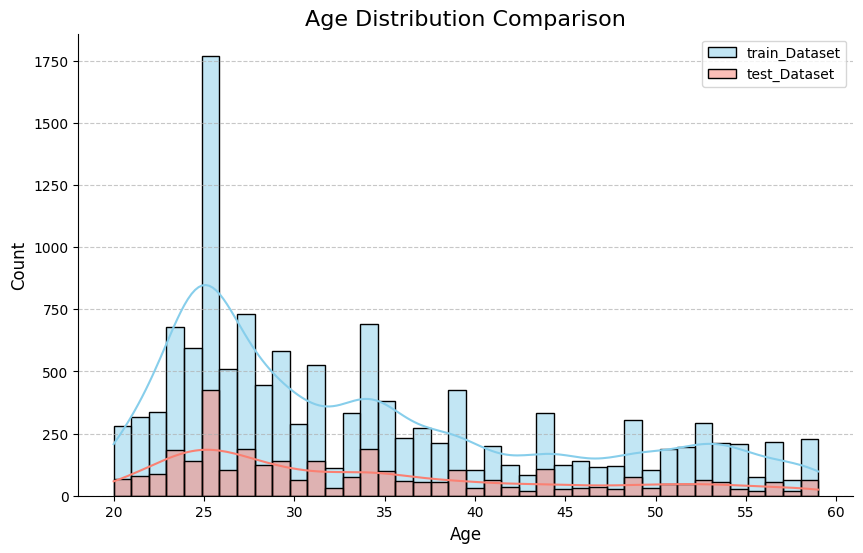

In [32]:

plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='age', bins=40, kde=True, color='skyblue', label='train_Dataset', edgecolor='black')
sns.histplot(data=df2, x='age', bins=40, kde=True, color='salmon', label='test_Dataset', edgecolor='black')

plt.title('Age Distribution Comparison', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

sns.despine()

plt.legend()  
plt.show()


In [28]:
model=models.swin_t( pretrained=True)
print(model)

c:\Users\ALIENWARE\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\ALIENWARE\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Swin_T_Weights.IMAGENET1K_V1`. You can also use `weights=Swin_T_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/swin_t-704ceda3.pth" to C:\Users\ALIENWARE/.cache\torch\hub\checkpoints\swin_t-704ceda3.pth
100%|██████████| 108M/108M [00:05<00:00, 22.7MB/s] 


SwinTransformer(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (1): Permute()
      (2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
    )
    (1): Sequential(
      (0): SwinTransformerBlock(
        (norm1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
        (attn): ShiftedWindowAttention(
          (qkv): Linear(in_features=96, out_features=288, bias=True)
          (proj): Linear(in_features=96, out_features=96, bias=True)
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
        (norm2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
        (mlp): MLP(
          (0): Linear(in_features=96, out_features=384, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=384, out_features=96, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (1): SwinTransformerBlock(
       